## Setup

In [1]:
!pip list | egrep 'keras|tensorflow |torch '
!pip install -U keras

keras                                    2.15.0
keras-core                               0.1.7
keras-cv                                 0.8.1
keras-nlp                                0.7.0
keras-tuner                              1.4.6
tensorflow                               2.15.0
torch                                    2.1.2+cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.5 MB/s eta 0:00:0000:01
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.4 which is incompatible.
tensorflowjs 4.16.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.


In [2]:
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
print("Keras", keras.__version__, 'on', keras.backend.backend())
assert keras.__version__.startswith('3')
import numpy as np
np.set_printoptions(precision=3)
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

def show_weight_images(linear_layer):
    weight_images = linear_layer.kernel.value.data.T.view(-1, 28, 28).cpu().numpy()
    if weight_images.shape[0] == 10:
        nrow, ncol = 2, 5
    else:
        nrow, ncol = 1, 1
    with matplotlib.rc_context(rc={'image.cmap': 'RdBu'}):
        vmax = np.abs(weight_images).max()
        fig, axs = plt.subplots(nrow, ncol, squeeze=False)
        for i, ax in enumerate(axs.flatten()):
            ax.imshow(weight_images[i], vmax=vmax, vmin=-vmax)
            ax.set(title=f'{i}')
            ax.axis('off')

Keras 3.0.4 on torch


# Data Loading

In [3]:
from keras.datasets import mnist

DATASET = 'toy2'

if DATASET == 'toy':
    x = np.array([0, 1, 2, 3])[:, np.newaxis]
    y_true = np.array([-1, .5, 2.0, 3.5])[:, np.newaxis]
if DATASET == 'toy2':
    x = np.array([0, 1, 2, 3])[:, np.newaxis]
    y_true = np.array([-1, .5, 2.0, 25])[:, np.newaxis]
elif DATASET == "temps":
    data = pd.read_csv("https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv", skiprows=1)
    # Shape x to be items-by-features
    x = data.iloc[:, 0].values.astype(np.float32)[:, np.newaxis]
    # scale x to a reasonable range
    x -= 1880.0
    x /= 100.
    y_true = data.iloc[:, 1].values.astype(np.float32)[:, np.newaxis]
elif DATASET == 'mnist':
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    train_images = train_images.reshape((60000, 28 * 28))
    train_images = train_images.astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28))
    test_images = test_images.astype("float32") / 255
    
    # Rename to match the convention of our notebook
    x, y_true = train_images, train_labels
    del train_images, train_labels
else:
    raise Exception("Unknown dataset")

Show the data (or an example item from it)

x shape (4, 1) y_true shape (4, 1)


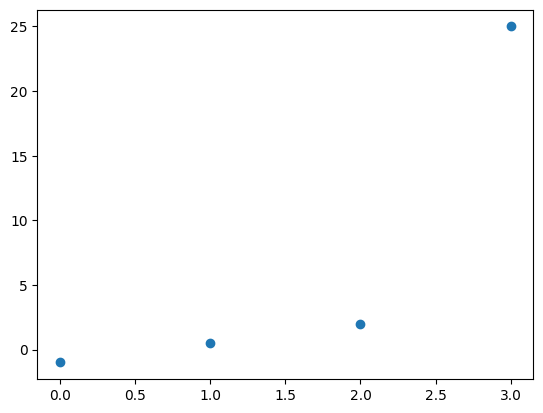

In [4]:
if len(x) < 50:
    plt.scatter(x, y_true)
elif x.shape[1] == 1:
    plt.plot(x, y_true)
else:
    with matplotlib.rc_context(rc={'image.cmap': 'gray_r'}):
        plt.imshow(x[0].reshape(28, 28))
print("x shape", x.shape, "y_true shape", y_true.shape)

# Train and Evaluate Model

In [5]:
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(1)
])
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    loss='mae',
)
history = model.fit(x, y_true, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 7.8866
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.6366
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3866
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1366
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8866
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6366
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4827
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3827
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.2827
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1827
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.0827
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0250
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.9827
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9750
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Final Loss: 5.375, final weights: [1.642], final bias: [-1.]


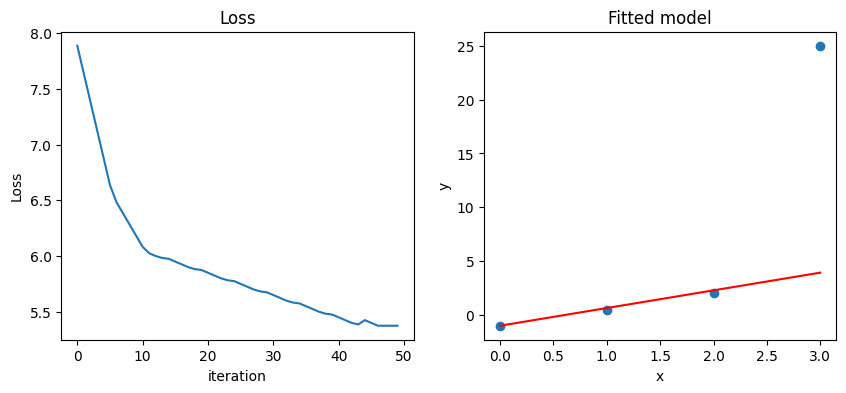

In [6]:
# Extract results from Keras
y_pred = model.predict(x)
losses = history.history['loss']
linear_layer = model.layers[-1]
weights, bias = linear_layer.get_weights()

# Plot the results
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].plot(losses)
axs[0].set(title="Loss", xlabel="iteration", ylabel="Loss")
if x.shape[1] == 1:
    axs[1].scatter(x, y_true)
    axs[1].plot(x, y_pred, 'r');
    axs[1].set(title="Fitted model", xlabel='x', ylabel='y')
else:
    axs[1].hist(y_pred.flatten(), bins=30)
    axs[1].set(title="Values in predictions")
print(f"Final Loss: {losses[-1]:.3f}, final weights: {weights.flatten() if len(weights.flatten()) < 25 else weights.shape}, final bias: {bias}")

In [7]:
# show_weight_images(linear_layer)

# Analysis